<a href="https://colab.research.google.com/github/Sakujun/InfoVis2021/blob/master/No.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


   0   0   0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 130 183 253 253 207   2   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  39 148 229 253 253 253 250 182   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  24 114 221 253 253 253 253 201  78   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  23  66 213 253 253 253 253 198  81   2   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  18 171 219 253 253 253 253 195  80   9   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  55 172 226 253 253 253 253 244 133  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 136 253 253 253 212 135 132  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

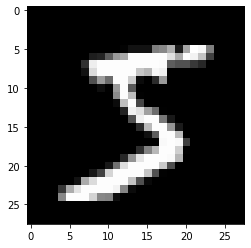

In [1]:
# loading PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# definition of your neural network
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # linear transformations
        self.l1 = nn.Linear(input_size,hidden_size)
        self.l2 = nn.Linear(hidden_size,output_size)

    def forward(self, x):
        # the actual computation performed by the neural network
        x = self.l1(x)
        # activation function. tanh, sigmoid, relu etc.
        x = torch.tanh(x)
        #x = torch.sigmoid(x)
        #x = torch.relu(x)
        x = self.l2(x)
        return torch.softmax(x,dim=1)

import torchvision
import torchvision.transforms as transforms

# Data loading. Normalize the data and transform it into tensor variables.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
data_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Batch size. Determines how many data are used for training at a time.
# The smaller the batch size, the better the performance, but it takes more computation time (because little data is available for parallel computation).
MY_BATCH_SIZE = 100

# Preparing the data for use.
train_loader = torch.utils.data.DataLoader(data_train,batch_size=MY_BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=MY_BATCH_SIZE,shuffle=False)

import matplotlib.pyplot as plt
# Take a look at the data.
for i in range(28):
  for j in range(28):
    print(f'{data_train.data[0][i][j]:4}', end='')
  print()
plt.imshow(data_train.data[0], cmap='gray')
print(data_train.targets[0].item())
import random
# Computing using the GPU if available. If something goes wrong, set device = 'cpu'.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'

# Confirm which GPU we can use.
!nvidia-smi

# Creating a new MLP.
# The size of the neural network. hidden part can be modified.
num_inputs = 784
num_outputs = 10
num_hidden = 32
mynet = MLP(num_inputs,num_hidden,num_outputs).to(device)

# How long to train. Please start with a small value and see how it goes.
num_epochs = 20

# The loss function.
criterion = nn.CrossEntropyLoss()

# The learning algorithm. Please change the learning rate "lr"
optimizer = optim.SGD(params=mynet.parameters(), lr=0.1)

history_loss = []
history_eval = []
history_acc = []

# Start Learning
for epoch in range(num_epochs):
  # First, switch the network to the learning mode.
  mynet.train()

  total_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    # Converts the image to a 1D array.
    data = data.view(-1, 28*28)

    # Initialize the derivative to zero.
    # Compute the output of the network, the loss function, and its derivative,
    # and run the learning algorithm using the computed derivative.
    optimizer.zero_grad()
    output = mynet(data.to(device))
    loss = criterion(output, target.to(device))
    loss.backward()
    optimizer.step()

    # Sum of the loss function for each batch.
    total_loss = total_loss + loss.cpu().item()

  # Validation using the test data (different from the training data).
  num_correct = 0
  num_data = 0
  # Because we do not need to run the training algorithm,
  # we switch the network to the evaluation mode (so that the derivative is not computed).
  mynet.eval()
  with torch.no_grad():
    eval_loss = 0.0
    for i, (data, target) in enumerate(test_loader):
      data = data.view(-1, 28*28)
      output = mynet(data.to(device))
      loss = criterion(output, target.to(device))
      eval_loss = total_loss + loss.cpu().item()
      num_correct = num_correct + output.cpu().argmax(dim=1).eq(target).sum()
      num_data = num_data + data.shape[0]

  history_loss.append(total_loss)
  history_eval.append(eval_loss)
  history_acc.append(num_correct.item()/num_data)
  print("{}/{} training loss: {}, evaluation loss: {}".format(epoch,num_epochs,total_loss,eval_loss))
  print("accuracy: {}/{}={}".format(num_correct, num_data,num_correct.item()/num_data))
  rnd=random.sample(range(len(target)),10)
  for i in range(10):
    print("(prediction: {}, truth: {}), ".format(output[rnd[i]].argmax().item(), target[rnd[i]].item()), end='')
    if(i==4 or i==9):
      print()
  print()
